In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Input, Concatenate, Average
from tensorflow import keras
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
TRAIN_SET = './ptb_train_set.pickle'
TEST_SET = './ptb_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)
x_train.shape

TensorShape([13097, 187, 1])

In [3]:
LSTM = keras.models.load_model('LSTM_PTB')
CNN = keras.models.load_model('CNN_PTB')
MLP = keras.models.load_model('MLP_PTB')

inputs = Input(shape=x_train.shape[1:])
cnn = CNN(inputs)
lstm = LSTM(inputs)
mlp = MLP(inputs)

y = Average()([cnn, lstm, mlp])


model = Model(inputs = inputs, outputs = y)

In [4]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
410/410 [==============================] - 35s 76ms/step - loss: 0.1858 - accuracy: 0.9476 - val_loss: 0.2166 - val_accuracy: 0.9457
Epoch 2/20
410/410 [==============================] - 29s 71ms/step - loss: 0.1865 - accuracy: 0.9466 - val_loss: 0.2088 - val_accuracy: 0.9416
Epoch 3/20
410/410 [==============================] - 31s 76ms/step - loss: 0.1922 - accuracy: 0.9496 - val_loss: 0.2026 - val_accuracy: 0.9464
Epoch 4/20
410/410 [==============================] - 30s 73ms/step - loss: 0.1831 - accuracy: 0.9515 - val_loss: 0.2103 - val_accuracy: 0.9478
Epoch 5/20
410/410 [==============================] - 28s 69ms/step - loss: 0.1855 - accuracy: 0.9547 - val_loss: 0.2146 - val_accuracy: 0.9216
Epoch 6/20
410/410 [==============================] - 33s 81ms/step - loss: 0.1989 - accuracy: 0.9453 - val_loss: 0.2093 - val_accuracy: 0.9560
Epoch 7/20
410/410 [==============================] - 31s 76ms/step - loss: 0.1928 - accuracy: 0.9502 - val_loss: 0.2026 - val_accuracy:

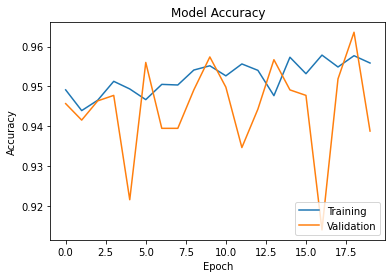

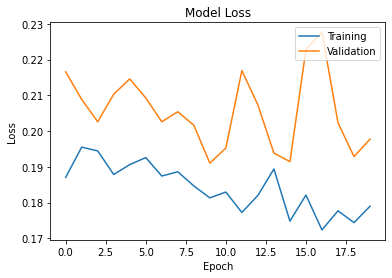

In [6]:
from sklearn.metrics import confusion_matrix


fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper right')


plt.show()


In [15]:
predictions = np.round(model.predict(x_test))


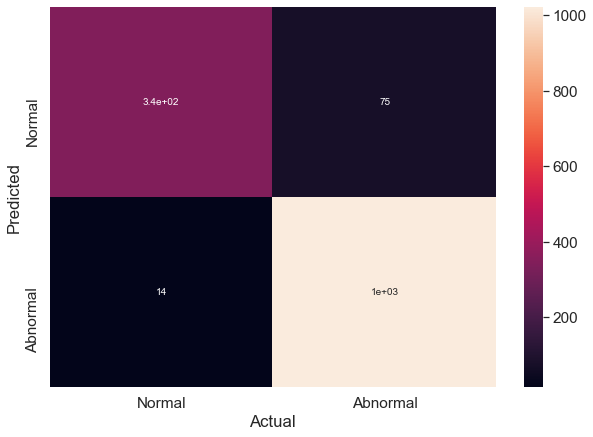

In [21]:
matrix = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()